# Keep it rolling -- The Journeys of our Soccer Player

In [731]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['pdf.fonttype'] = 42
from datetime import datetime
from dateutil.parser import parse

## Import and clean the data

In [732]:
df_raw = pd.read_csv('data/yb1.csv')
df_raw.head()

,Name,Vorname,Klub,Stadt,Land,von,bis,Unnamed: 7,Klub.1,Stadt.1,...,Stadt.15,Land.15,von.15,bis.15,Unnamed: 97,Klub.16,Stadt.16,Land.16,von.16,bis.16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aebi,Dominique,YB II (Bern),Bern,Schweiz,NaN,30/06/2006,NaN,YB (Bern),YB (Bern),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Affolter,François,Biel,Biel,Schweiz,NaN,30/06/2007,NaN,YB U-18 (Bern),Bern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afum,Samuel,Hearts of Oak,Accra,Ghana,NaN,30/06/2010,NaN,Smouha,Alexandria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aziawonou,Yao,Merlan Lome,Lomé,Togo,NaN,30/06/1997,NaN,Nantes,Nantes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [733]:
# Taking out just the names of the players.
df_names = df_raw[['Name','Vorname']]

In [734]:
'''# Get the other clubs.
clubs = 15
df_clubs = []
stadt_series = pd.Series()
land_series = pd.Series()
lat_series = pd.Series()
long_series = pd.Series()
bis_series = pd.Series()

for club in range(1,clubs + 1):
    stadt = 'Stadt.' + str(club)
    land = 'Land.' + str(club)
    lat = 'Lat.' + str(club)
    lon = 'Lon.' + str(club)
    bis = 'bis.' + str(club)
    
    stadt_series = pd.concat([stadt_series, stadt] ignore_index=True)
    land_series = pd.concat([land_series, land] ignore_index=True)
    lat_series = pd.concat([lat_series, lat] ignore_index=True)
    lon_series = pd.concat([lon_series, lon] ignore_index=True)
    bis_series = pd.concat([bis_series, bis] ignore_index=True)
    
    df_clubs.append((df[stadt], df[land], df[lat], df[lon], df[bis]))'''

"# Get the other clubs.\nclubs = 15\ndf_clubs = []\nstadt_series = pd.Series()\nland_series = pd.Series()\nlat_series = pd.Series()\nlong_series = pd.Series()\nbis_series = pd.Series()\n\nfor club in range(1,clubs + 1):\n    stadt = 'Stadt.' + str(club)\n    land = 'Land.' + str(club)\n    lat = 'Lat.' + str(club)\n    lon = 'Lon.' + str(club)\n    bis = 'bis.' + str(club)\n    \n    stadt_series = pd.concat([stadt_series, stadt] ignore_index=True)\n    land_series = pd.concat([land_series, land] ignore_index=True)\n    lat_series = pd.concat([lat_series, lat] ignore_index=True)\n    lon_series = pd.concat([lon_series, lon] ignore_index=True)\n    bis_series = pd.concat([bis_series, bis] ignore_index=True)\n    \n    df_clubs.append((df[stadt], df[land], df[lat], df[lon], df[bis]))"

In [735]:
# Get the number of transfers for the player with the most transfers
clubs = df_raw.columns
clubs = clubs[len(clubs) - 1]
clubs = int(clubs[-2] + clubs[-1])

# Taking the extra columns on the right and attaching the data below. 
df_stadt = pd.concat([df_raw["Stadt"],df_raw["Stadt.1"]], ignore_index=True)
df_land = pd.concat([df_raw["Land"],df_raw["Land.1"]], ignore_index=True)
#df_lat = pd.concat([df_raw["Lat"],df_raw["Lat.1"]], ignore_index=True)
#df_lon = pd.concat([df_raw["Lon"],df_raw["Lon.1"]], ignore_index=True)
df_klub = pd.concat([df_raw["Klub"],df_raw["Klub.1"]], ignore_index=True)
df_von = pd.concat([df_raw["von"],df_raw["von.1"]], ignore_index=True)
df_von = pd.to_datetime(df_von, errors='coerce')
df_bis = pd.concat([df_raw["bis"],df_raw["bis.1"]], ignore_index=True)
df_bis = pd.to_datetime(df_bis, errors='coerce')

for club in range(1,clubs + 1):
    stadt = 'Stadt.' + str(club)
    land = 'Land.' + str(club)
    klub = 'Klub.' + str(club)
    #lat = 'Lat.' + str(club)
    #lon = 'Lon.' + str(club)
    von = 'von.' + str(club)
    bis = 'bis.' + str(club)
    
    df_stadt = pd.concat([df_stadt,df_raw[stadt]], ignore_index=True)
    df_land = pd.concat([df_land,df_raw[land]], ignore_index=True)
    df_klub = pd.concat([df_klub,df_raw[klub]], ignore_index=True)
    #df_lat = pd.concat([df_lat,df_raw[lat]], ignore_index=True)
    #df_long = pd.concat([df_lon,df_raw[lon]], ignore_index=True)
    df_von = pd.concat([df_von,df_raw[von]], ignore_index=True)
    df_bis = pd.concat([df_bis,df_raw[bis]], ignore_index=True)
    
    # Adding additional names to the name column.
    df_names = pd.concat([df_names,df_names], ignore_index=True)

In [736]:
'''# Todo: Generating the number of the transfer.
df_transfer = []

for club in range(0,clubs):
    for player in range(0,len(df_raw)):
        df_transfer.append(int(club)) # Adding the transfer number.
df_transfer = pd.DataFrame(df_transfer)
df_transfer = df_transfer.astype(int)
df_transfer.columns = ['Transfer']'''

"# Todo: Generating the number of the transfer.\ndf_transfer = []\n\nfor club in range(0,clubs):\n    for player in range(0,len(df_raw)):\n        df_transfer.append(int(club)) # Adding the transfer number.\ndf_transfer = pd.DataFrame(df_transfer)\ndf_transfer = df_transfer.astype(int)\ndf_transfer.columns = ['Transfer']"

In [737]:
'''df_transfer = pd.DataFrame(df_transfer)
df_names = pd.DataFrame(df_names)
test_df = pd.concat([df_transfer,df_names], axis=1)
test_df.tail()'''

'df_transfer = pd.DataFrame(df_transfer)\ndf_names = pd.DataFrame(df_names)\ntest_df = pd.concat([df_transfer,df_names], axis=1)\ntest_df.tail()'

In [738]:
# Putting the dataframes together.
try:
    #df_transfer = pd.DataFrame(df_transfer)
    #df_transfer.columns = ['Transfer']
    df_stadt = df_stadt.to_frame()
    df_stadt.columns = ["Stadt"]
    df_land = df_land.to_frame()
    df_land.columns = ["Land"]
    df_klub = df_klub.to_frame()
    df_klub.columns = ["Klub"]
    #df_lat = df_lat.to_frame()
    #df_lat.columns = ["Lat"]
    #df_lon = df_lon.to_frame()
    #df_lon.columns = ["Lon"]
    df_von = df_von.to_frame()
    df_von.columns = ["Von"]
    df_bis = df_bis.to_frame()
    df_bis.columns = ["Bis"]
except:
    pass

df = pd.concat([df_names, df_stadt, df_land, df_klub, df_von, df_bis], axis=1)

In [739]:
# Filling in a field with the full name. Just for convenience. 
df['Voller Name'] = df['Vorname'] + ' ' + df['Name']

In [740]:
# Deleting the empty entries. 
df = df[df.Stadt.notnull()]
df = df[df.Name.notnull()]

In [741]:
# For some reason there are duplicates in the dataframe. Probably they are generated when indexing. 
# I have to take a look at this problem. For now, I am just removing the duplicates. 
df = df.drop_duplicates()
df.head()

,Name,Vorname,Stadt,Land,Klub,Von,Bis,Voller Name
1,Aebi,Dominique,Bern,Schweiz,YB II (Bern),NaT,2006-06-30,Dominique Aebi
2,Affolter,François,Biel,Schweiz,Biel,NaT,2007-06-30,François Affolter
3,Afum,Samuel,Accra,Ghana,Hearts of Oak,NaT,2010-06-30,Samuel Afum
4,Aziawonou,Yao,Lomé,Togo,Merlan Lome,NaT,1997-06-30,Yao Aziawonou
5,Bastians,Felix,Bochum,Deutschland,Wattenscheid Jugend,NaT,1997-06-30,Felix Bastians


In [742]:
# There are some strange values in the first dataset. Before merging them, I need to clean the data.
# The town of YB for example is 'YB (Bern)'. We are correcting this using regular expressions. 

import re

def kick_the_club(clubstring): 
    match1 = re.search(r'\((\w*)\)', clubstring)
    match2 = re.search(r'(\w*) U-16', clubstring)
    match3 = re.search(r'(\w*) II', clubstring)
    if match1:
        return match1.group(1)
    elif match2:
        return match2.group(1)
    elif match3:
        return match3.group(1)
    else:
        return clubstring

df['Stadt'] = df['Stadt'].apply(kick_the_club)

In [743]:
def kick_the_town(townstring): 
    match = re.search(r'.+?(?=\(\w*\))', townstring)
    if match:
        return match.group(0)
    else:
        return townstring

df['Klub'] = df['Klub'].apply(kick_the_town)
df.head(20)


,Name,Vorname,Stadt,Land,Klub,Von,Bis,Voller Name
1,Aebi,Dominique,Bern,Schweiz,YB II,NaT,2006-06-30,Dominique Aebi
2,Affolter,François,Biel,Schweiz,Biel,NaT,2007-06-30,François Affolter
3,Afum,Samuel,Accra,Ghana,Hearts of Oak,NaT,2010-06-30,Samuel Afum
4,Aziawonou,Yao,Lomé,Togo,Merlan Lome,NaT,1997-06-30,Yao Aziawonou
5,Bastians,Felix,Bochum,Deutschland,Wattenscheid Jugend,NaT,1997-06-30,Felix Bastians
6,Battista,Daniele,Bern,Schweiz,YB U-18,NaT,2005-12-31,Daniele Battista
7,Bertone,Leonardo,Bern,Schweiz,YB U-18,NaT,2012-06-30,Leonardo Bertone
8,Ben Khalifa,Nassim,Lausanne,Schweiz,Team Vaud U-16,NaT,2008-06-30,Nassim Ben Khalifa
9,Benito,Ivan,Aarau,Schweiz,Aarau,NaT,2003-06-30,Ivan Benito
10,Bettoni,Patrick,Winterthur,Schweiz,Winterthur,NaT,1996-06-30,Patrick Bettoni


In [744]:
# Adding a new column -- just for convenience while geocoding. 
df['Stadtland'] = df['Stadt'] + ', ' + df['Land']

### Import information about each player
First we'll import the data. After there's some housekeeping needed. 

In [745]:
df_player = pd.read_csv('data/spielerdaten.csv')
df_player['Geburtsdatum'] = pd.to_datetime(df_player['Geb.Datum'], errors='coerce')
pd.DataFrame(df_player)
del df_player['Geb.Datum']

# Filling in a field with the full name. Just for convenience. 
df_player['Voller Name'] = df_player['Vorname'] + ' ' + df_player['Name']
del df_player['Unnamed: 2']
df_player.head()

,Saisonbeginn,Saisonende,Name,Vorname,Einsätze,Tore,Vorlagen,Geburtsdatum,Voller Name
0,2003,2004,Rochat,Alain,20,1,NaN,NaT,Alain Rochat
1,2003,2004,Rochat,Alain,35,NaN,NaN,NaT,Alain Rochat
2,2003,2004,Wölfli,Marco,34,NaN,NaN,1982-08-22,Marco Wölfli
3,2004,2005,Rochat,Alain,33,2,NaN,NaT,Alain Rochat
4,2004,2005,Wölfli,Marco,15,NaN,NaN,1982-08-22,Marco Wölfli


In [746]:
# Todo: Add the Birthday to the main dataframe.
df = pd.merge(df, df_player[['Voller Name','Geburtsdatum']], on='Voller Name')

In [747]:
df.head()

,Name,Vorname,Stadt,Land,Klub,Von,Bis,Voller Name,Stadtland,Geburtsdatum
0,Aebi,Dominique,Bern,Schweiz,YB II,NaT,2006-06-30,Dominique Aebi,"Bern, Schweiz",1988-04-05
1,Aebi,Dominique,Bern,Schweiz,YB II,NaT,2006-06-30,Dominique Aebi,"Bern, Schweiz",1988-04-05
2,Aebi,Dominique,Bern,Schweiz,YB,2006-01-07,2007-07-31,Dominique Aebi,"Bern, Schweiz",1988-04-05
3,Aebi,Dominique,Bern,Schweiz,YB,2006-01-07,2007-07-31,Dominique Aebi,"Bern, Schweiz",1988-04-05
4,Aebi,Dominique,Köniz,Schweiz,Köniz,2012-01-07,2013-12-31,Dominique Aebi,"Köniz, Schweiz",1988-04-05


### Geocode the towns or stadiums

In [748]:
# Now, we will add the location data about the stadiums, if available. 
# Source: http://opisthokonta.net/?p=619, aggregated from Wikipedia.
df_stadium = pd.read_csv('data/stadiums_20150302.csv')
df_stadium.head()

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England
1,Aston Villa,Aston Villa,Birmingham,Villa Park,42785,52.509167,-1.884722,England
2,Blackburn Rovers,Blackburn,Blackburn,Ewood Park,31154,53.728611,-2.489167,England
3,Bolton Wanderers,Bolton,Bolton,Reebok Stadium,28100,53.580556,-2.535556,England
4,Chelsea,Chelsea,London,Stamford Bridge,42449,51.481667,-0.191111,England


In [749]:
df_stadium = df_stadium.dropna()
print(len(df_stadium['City'].values))

163


In [750]:
# For some reason, the normal query doesn't work. We'll use contain instead. 
#df_stadium[df_stadium['City'] == 'Bolton']
df_stadium[df_stadium['City'].str.contains('Bolton')]

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
3,Bolton Wanderers,Bolton,Bolton,Reebok Stadium,28100,53.580556,-2.535556,England


In [751]:
# Add the coordinates from the dataframe df_stadium to df.
df = pd.merge(df, df_stadium[['Team', 'Stadium', 'Latitude', 'Longitude']], left_on='Klub', right_on='Team', how='left')
del df['Team']

In [752]:
# If there are no coordinates in the table, we will try to geocode it.
# But first, we check: How many Coordinates are already in?
df['Latitude'].dropna()

1609    53.370278
1610    53.370278
1613    53.370278
1614    53.370278
2714    53.411389
2715    53.411389
2716    53.411389
Name: Latitude, dtype: float64

In [753]:
# Let's collect the stadiums from Europe and parts of Africa from Openstreetmap.
# This takes a long time to run.

'''import overpass
api = overpass.API(timeout=600)
map_query = overpass.MapQuery(-26.5,20.2,52.8,61.3)
response = api.Get('node["leisure"="stadium"]')'''

'import overpass\napi = overpass.API(timeout=600)\nmap_query = overpass.MapQuery(-26.5,20.2,52.8,61.3)\nresponse = api.Get(\'node["leisure"="stadium"]\')'

In [754]:
'''response['features'][0]'''

"response['features'][0]"

In [755]:
'''osm_stadiums = response['features']
df_osm_stadiums = dict()
for stadium in osm_stadiums:
    try: 
        df_osm_stadiums[stadium['properties']['name']] = stadium['geometry']['coordinates'] 
    except: 
        pass
df_osm_stadiums = pd.DataFrame(df_osm_stadiums).transpose()
df_osm_stadiums.reset_index(level=0, inplace=True)
df_osm_stadiums.columns = ['Klub', 'Latitude', 'Longitude']
'''

"osm_stadiums = response['features']\ndf_osm_stadiums = dict()\nfor stadium in osm_stadiums:\n    try: \n        df_osm_stadiums[stadium['properties']['name']] = stadium['geometry']['coordinates'] \n    except: \n        pass\ndf_osm_stadiums = pd.DataFrame(df_osm_stadiums).transpose()\ndf_osm_stadiums.reset_index(level=0, inplace=True)\ndf_osm_stadiums.columns = ['Klub', 'Latitude', 'Longitude']\n"

In [756]:
df_osm_stadiums.head()

,Klub,Latitude,Longitude
0,"""Детская спортивная школа""",23.742809,52.097911
1,"""Нефтянник""",52.291564,54.908316
2,"""Спутник""",52.294112,54.906382
3,12 Şubat Stadyumu,36.922860,37.574292
4,13 de diciembre,-76.132310,9.243761


In [757]:
#df_osm_stadiums['Klub'] == df['Klub']
first_list = set(df_osm_stadiums['Klub'].dropna().values)
first_list = list(first_list)
second_list = set(df['Klub'].dropna().values)
second_list = list(second_list)

# Check if there is data that matches. 
success = 0
failure = 0
new_stadiums = dict()
for i in first_list:
    for j in second_list:
        if j in i:
            success += 1
            lat = float(df_osm_stadiums[df_osm_stadiums['Klub'] == i][['Latitude']].values)
            lon = float(df_osm_stadiums[df_osm_stadiums['Klub'] == i][['Longitude']].values)
            new_stadiums[j] = [lat,lon]
        else:
            failure += 1
print(success)

first_list = set(df_osm_stadiums['Klub'].dropna().values)
first_list = list(first_list)
second_list = set(df['Stadt'].dropna().values)
second_list = list(second_list)

# Check if there is data that matches. 
success = 0
failure = 0
new_stadiums = dict()
for i in first_list:
    for j in second_list:
        if j in i:
            success += 1
            lat = float(df_osm_stadiums[df_osm_stadiums['Klub'] == i][['Latitude']].values)
            lon = float(df_osm_stadiums[df_osm_stadiums['Klub'] == i][['Longitude']].values)
            new_stadiums[j] = [lat,lon]
        else:
            failure += 1
print(success)

12
15


In [758]:
# Try to merge the Openstreetmap data with the dataframe.  
new_stadiums = pd.DataFrame(new_stadiums).transpose()
new_stadiums = new_stadiums.reset_index()
new_stadiums.columns = ['Stadt', 'Latitude', 'Longitude']
df = pd.merge(df, new_stadiums[['Stadt', 'Latitude', 'Longitude']], on='Stadt')

In [759]:
# We are adding some previous downloaded geodata. 
df_city_coordinates = pd.read_csv('data/geolocations.csv')
df_city_coordinates.columns = ['Stadtland', 'Latitude', 'Longitude']
df = pd.merge(df, df_city_coordinates, left_on='Stadtland', right_on='Stadtland', how='left')

In [760]:
df['Latitude'] = pd.concat([df['Latitude_x'].dropna(), df['Latitude_y'].dropna()]).reindex_like(df)
df['Longitude'] = pd.concat([df['Longitude_x'].dropna(), df['Longitude_y'].dropna()]).reindex_like(df)
del df['Latitude_x']
del df['Longitude_x']
del df['Latitude_y']
del df['Longitude_y']

In [761]:
df.head()

,Name,Vorname,Stadt,Land,Klub,Von,Bis,Voller Name,Stadtland,Geburtsdatum,Stadium,Latitude,Longitude
0,Aebi,Dominique,Bern,Schweiz,YB II,NaT,2006-06-30,Dominique Aebi,"Bern, Schweiz",1988-04-05,NaN,36.784102,-1.314682
1,Aebi,Dominique,Bern,Schweiz,YB II,NaT,2006-06-30,Dominique Aebi,"Bern, Schweiz",1988-04-05,NaN,36.784102,-1.314682
2,Aebi,Dominique,Bern,Schweiz,YB,2006-01-07,2007-07-31,Dominique Aebi,"Bern, Schweiz",1988-04-05,NaN,36.784102,-1.314682
3,Aebi,Dominique,Bern,Schweiz,YB,2006-01-07,2007-07-31,Dominique Aebi,"Bern, Schweiz",1988-04-05,NaN,36.784102,-1.314682
4,Affolter,François,Bern,Schweiz,YB U-18,2007-01-07,2008-11-25,François Affolter,"Bern, Schweiz",1991-03-13,NaN,36.784102,-1.314682


In [762]:
# Now we are creating a dataframe with all missing towns -- with unique values to avoid 
# overload or blocking while geocoding.

towns = df.where(pd.isnull(df['Latitude']))[['Stadtland']]
townlist = towns['Stadtland'].unique()
townlist = pd.DataFrame(townlist)
townlist.columns = ['Stadtland']
townlist = townlist.dropna()
len(townlist)

0

In [763]:
# Geocode the list with the towns. Attention: Run this cell ony if needed. The values are saved to a csv
# for further reference. The csv is loaded above. 
'''from geopy.geocoders import Nominatim
from geopy.distance import vincenty
geolocator = Nominatim()

d = dict(zip(townlist['Stadtland'], pd.Series(townlist['Stadtland']).apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))))

# Save the locations to a file. 
df_geo_locations = pd.DataFrame(d)
df_geo_locations = df_geo_locations.transpose()
df_geo_locations.columns = ['Latitude', 'Longitude']
df_geo_locations.to_csv('data/geolocations.csv', sep=',', encoding='utf-8')

# Add the new data to the dataframe. 
df['Geo'] = df['Stadtland'].map(d)'''

"from geopy.geocoders import Nominatim\nfrom geopy.distance import vincenty\ngeolocator = Nominatim()\n\nd = dict(zip(townlist['Stadtland'], pd.Series(townlist['Stadtland']).apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))))\n\n# Save the locations to a file. \ndf_geo_locations = pd.DataFrame(d)\ndf_geo_locations = df_geo_locations.transpose()\ndf_geo_locations.columns = ['Latitude', 'Longitude']\ndf_geo_locations.to_csv('data/geolocations.csv', sep=',', encoding='utf-8')\n\n# Add the new data to the dataframe. \ndf['Geo'] = df['Stadtland'].map(d)"

In [764]:
# Which towns are not geocoded? The name of some of these towns might be corrected manually. 
df.where(pd.isnull(df['Latitude']))[['Stadtland']].dropna()

,Stadtland


In [765]:
# Reindexing: Use the date as index.
df.index = df['Von']
df = df.sort_index()

In [766]:
df.head()

,Name,Vorname,Stadt,Land,Klub,Von,Bis,Voller Name,Stadtland,Geburtsdatum,Stadium,Latitude,Longitude
Von,,,,,,,,,,,,,
1993-01-07,Collaviti,Paolo,Bern,Schweiz,YB,1993-01-07,1999-06-30,Paolo Collaviti,"Bern, Schweiz",1978-02-02,NaN,36.784102,-1.314682
1993-01-07,Collaviti,Paolo,Bern,Schweiz,YB,1993-01-07,1999-06-30,Paolo Collaviti,"Bern, Schweiz",1978-02-02,NaN,36.784102,-1.314682
1993-01-07,Collaviti,Paolo,Bern,Schweiz,YB,1993-01-07,1999-06-30,Paolo Collaviti,"Bern, Schweiz",1978-02-02,NaN,36.784102,-1.314682
1995-01-07,Sermeter,Gürkan,Bern,Schweiz,YB,1995-01-07,1996-06-30,Gürkan Sermeter,"Bern, Schweiz",1974-02-14,NaN,36.784102,-1.314682
1995-01-07,Sermeter,Gürkan,Bern,Schweiz,YB,1995-01-07,1996-06-30,Gürkan Sermeter,"Bern, Schweiz",1974-02-14,NaN,36.784102,-1.314682


## Exploring the data

In [767]:
# Show all entries for a specified football player, eg. Samuel Afum. 

df[df['Voller Name'] == 'Samuel Afum']

,Name,Vorname,Stadt,Land,Klub,Von,Bis,Voller Name,Stadtland,Geburtsdatum,Stadium,Latitude,Longitude
Von,,,,,,,,,,,,,
2013-04-01,Afum,Samuel,Bern,Schweiz,YB,2013-04-01,NaT,Samuel Afum,"Bern, Schweiz",1990-12-24,NaN,36.784102,-1.314682
2013-04-01,Afum,Samuel,Bern,Schweiz,YB,2013-04-01,NaT,Samuel Afum,"Bern, Schweiz",1990-12-24,NaN,36.784102,-1.314682
2013-04-01,Afum,Samuel,Bern,Schweiz,YB,2013-04-01,NaT,Samuel Afum,"Bern, Schweiz",1990-12-24,NaN,36.784102,-1.314682


In [768]:
# How many transfers did an athlete make (eg. Samuel Afum)?

len(df[df['Voller Name'] == 'Samuel Afum'])

3

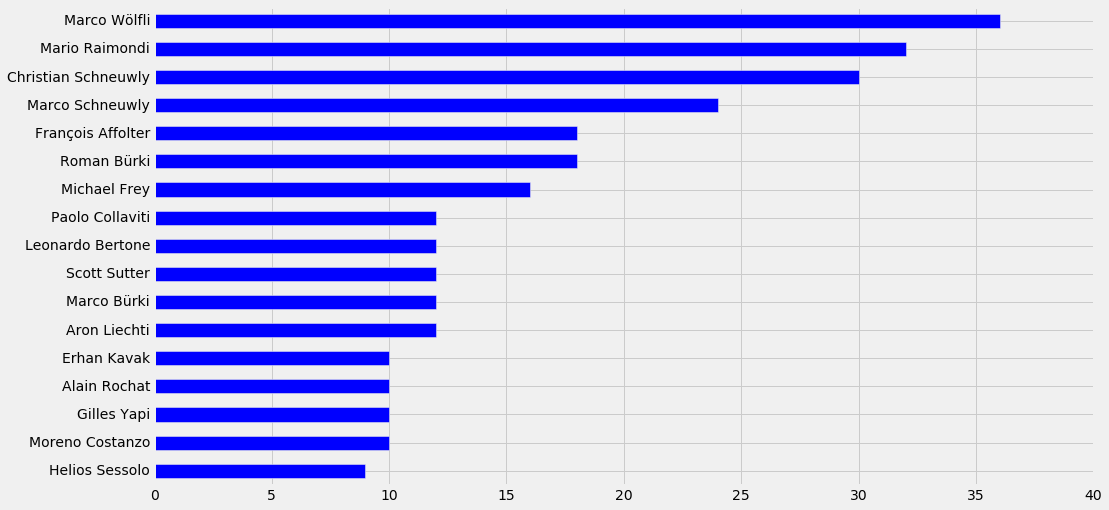

In [769]:
# Which athletes did make the most transfers?
fig, ax = plt.subplots(figsize=(15,8))
df['Voller Name'].value_counts().head(17).sort_values(ascending=True).plot(kind='barh', ax=ax)
fig.savefig('output/transferhero.png')

In [770]:
# From town to town -- let's take a closer look at Felix Bastians. 
df[df['Voller Name'] == 'Felix Bastians']

,Name,Vorname,Stadt,Land,Klub,Von,Bis,Voller Name,Stadtland,Geburtsdatum,Stadium,Latitude,Longitude
Von,,,,,,,,,,,,,
2008-10-07,Bastians,Felix,Bern,Schweiz,YB,2008-10-07,2009-06-07,Felix Bastians,"Bern, Schweiz",1988-09-05,NaN,36.784102,-1.314682


In [782]:
# Show all athletes that played in a specified town, eg. Wil. 
df[df['Stadt'] == 'Porto']

,Name,Vorname,Stadt,Land,Klub,Von,Bis,Voller Name,Stadtland,Geburtsdatum,Stadium,Latitude,Longitude
Von,,,,,,,,,,,,,
1997-01-07,Delfim,NaN,Porto,Portugal,Boavista Porto,1997-01-07,1998-06-30,NaN,"Porto, Portugal",1981-05-19,NaN,-16.847226,32.768582
1997-01-07,Delfim,NaN,Porto,Portugal,Boavista Porto,1997-01-07,1998-06-30,NaN,"Porto, Portugal",1979-09-29,NaN,-16.847226,32.768582
1997-01-07,Delfim,NaN,Porto,Portugal,Boavista Porto,1997-01-07,1998-06-30,NaN,"Porto, Portugal",1981-12-01,NaN,-16.847226,32.768582
1997-01-07,Delfim,NaN,Porto,Portugal,Boavista Porto,1997-01-07,1998-06-30,NaN,"Porto, Portugal",1977-05-02,NaN,-16.847226,32.768582
1997-01-07,Delfim,NaN,Porto,Portugal,Boavista Porto,1997-01-07,1998-06-30,NaN,"Porto, Portugal",1981-05-19,NaN,-16.847226,32.768582
1997-01-07,Delfim,NaN,Porto,Portugal,Boavista Porto,1997-01-07,1998-06-30,NaN,"Porto, Portugal",1976-02-15,NaN,-16.847226,32.768582
1997-01-07,Delfim,NaN,Porto,Portugal,Boavista Porto,1997-01-07,1998-06-30,NaN,"Porto, Portugal",1981-12-01,NaN,-16.847226,32.768582
1997-01-07,Delfim,NaN,Porto,Portugal,Boavista Porto,1997-01-07,1998-06-30,NaN,"Porto, Portugal",1975-10-11,NaN,-16.847226,32.768582
1997-01-07,Delfim,NaN,Porto,Portugal,Boavista Porto,1997-01-07,1998-06-30,NaN,"Porto, Portugal",1981-05-19,NaN,-16.847226,32.768582


In [785]:
# International versus national.
df[df['Land'] == 'Schweiz'].count()


Name            746
Vorname         647
Stadt           746
Land            746
Klub            746
Von             678
Bis             644
Voller Name     647
Stadtland       746
Geburtsdatum    740
Stadium           0
Latitude        746
Longitude       746
dtype: int64

In [786]:
df['Land'].value_counts()

Schweiz        746
Portugal        22
Frankreich       4
Nigeria          4
Holland          3
Niederlande      2
Schwez           1
Name: Land, dtype: int64

In [723]:
# Show all transfers from a specific year, eg. in 1997. 
df['1997']

KeyError: '1997'

In [463]:
# What player did play the shortest and the longest with YB? 

from datetime import datetime

def date_to_int(dayswithdays):
    match = re.search(r'(\d*) days', dayswithdays)
    if match:
        return int(match.group(1))

df['Days'] = df['Bis'] - df['Von']
df[['Bis', 'Voller Name','Days']].sort_values(by='Days', ascending=False).head(10)
df['Days'] = df['Days'].astype(str).apply(date_to_int)

In [724]:
# The player who stayed the shortest at YB.
df[['Voller Name', 'Days']].where(df['Klub'] == 'YB').where(df['Days'] <= 180).sort_values(by='Days', ascending=True).head(14)

KeyError: "['Days'] not in index"

In [468]:
# The player who stayed the longest at YB.
df[['Voller Name', 'Days']].where(df['Klub'] == 'YB').sort_values(by='Days', ascending=False).head(14)

,Voller Name,Days
Von,,
2000-01-07,Thomas Häberli,3432
2005-01-07,Mario Raimondi,3096
2000-01-07,Gürkan Sermeter,2366
1993-01-07,Paolo Collaviti,2365
2000-01-07,Mark Disler,2001
2002-01-07,Joel Magnin,2000
2001-01-07,Adrian Eugster,1819
2007-01-07,Marco Schneuwly,1819
2006-01-07,Xavier Hochstrasser,1819


In [513]:
pd.NaT

NaT

In [515]:
# To do... How old are the player when are coming to Bern?
time_at_yb = df[df['Klub'] == 'YB']

def age_at_yb(voller_name):
    try:
        startdate = df[df['Voller Name'] == voller_name]['Von'].values[0]
    except IndexError:
        startdate = pd.NaT
    try:
        birthday = df_player[df_player['Voller Name'] == voller_name]['Geburtsdatum'].values[0]
    except IndexError:
        birthday = pd.NaT
    return startdate - birthday

time_at_yb['Eintrittsalter'] = time_at_yb['Voller Name'].apply(age_at_yb)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [517]:
time_at_yb['Eintrittsalter'].describe()

count                          145
mean     6775 days 05:17:47.586206
std       984 days 20:35:55.140802
min             3046 days 00:00:00
25%             6248 days 00:00:00
50%             6758 days 00:00:00
75%             7314 days 00:00:00
max             9681 days 00:00:00
Name: Eintrittsalter, dtype: object

In [369]:
players = df['Voller Name'].unique()
df_yb_time = df[df['Klub'] == 'YB']
age_dict = {}
for player in players:
    yb_start = df_yb_time[df_yb_time['Voller Name'] == player]['Von'][0]
    birthday = df_player[df_player['Voller Name'] == player]['Geburtsdatum']
    #age_dict[player] = df[df['Voller Name'] == player]['Von'] - df_player[df_player['Voller Name'] == player]['Geburtsdatum']
birthday

IndexError: index out of bounds

In [ ]:
# How old are the player when are coming to Bern?

fig, ax = plt.subplots(figsize=(20,20))
df[['Name', 'Geburtstag']].plot(ax=ax, label=, legend=True, kind='barh')
ax.set_title("What forecast provider did recently do the best job?", fontsize=30)
ax.annotate('Grafik: Mathias Born', xy=(1, 0), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom')

fig.savefig('output/scatterage.png')

In [ ]:
players = df['Voller Name'].unique()
ybdays = dict()
for player in players:
    temp_player = df[df['Voller Name'] == player]
    temp_player = temp_player[temp_player['Klub'] == 'YB']
    ybdays[player] = days_between(temp_player['Bis'],temp_player['Von'])
ybdays

In [400]:
# How far are the traveling? Calculate the distance of their professional journeys.  
import numpy as np
def dist_from_coordinates(lat1, lon1, lat2, lon2):
  R = 6371  # Earth radius in km

  #conversion to radians
  d_lat = np.radians(lat2-lat1)
  d_lon = np.radians(lon2-lon1)

  r_lat1 = np.radians(lat1)
  r_lat2 = np.radians(lat2)

  #haversine formula
  a = np.sin(d_lat/2.) **2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon/2.)**2

  haversine = 2 * R * np.arcsin(np.sqrt(a))

  return haversine

In [407]:
# Let's test the function. 
dist_from_coordinates(46.940063,7.390292,31.200092,29.918739)

2599.0413274765192

In [401]:
# Here we are generating a dictionary with all the geoinformation for each player. 
travel_dict = dict()
for player in players:
    df_player = df[df['Voller Name'] == player][['Voller Name', 'Latitude','Longitude']]
    players_places = list()
    for index, row in df_player.iterrows():
        players_places.append([row['Latitude'], row['Longitude']])
    travel_dict[player] = players_places

In [471]:

'''for player in players: 
    for journey in travel_dict[player]:
        first_town = journey[0] + ',' + journey[1]
        seccnd_town = jo'''

"for player in players: \n    for journey in travel_dict[player]:\n        first_town = journey[0] + ',' + journey[1]\n        seccnd_town = jo"

In [473]:
travel_dict['Thomas Häberli']

[[47.1665361, 8.2899709],
 [47.169844299999994, 7.9884821],
 [47.035094799999996, 8.2791767],
 [47.55810770000001, 7.5878261],
 [46.9482713, 7.4514512],
 [nan, nan]]

In [ ]:
new_column = []                    #empty column for distance
for index,row in df.iterrows():
  lat1 = row['lat1'] #first row of location.lat column here
  lon1 = row['lon1'] #first row of location.long column here
  lat2 = row['lat2'] #second row of location.lat column here
  lon2 = row['lon2'] #second row of location.long column here
  value = dist_from_coordinates(lat1, lon1, lat2, lon2)  #get the distance
  new_column.append(value)   #append the empty list with distance values

df.insert(4,"Distance",new_column)  #4 is the index where you want to place your column. Column index starts with 0. "Distance" is the header and new_column are the values in the column.

In [ ]:

df[df['Voller Name'] == 'Carlos Varela']

## Export

In [ ]:
# Create a database of all players (Name, Birthday, 

# Create a )